In [1]:
# %matplotlib qt
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt     
import matplotlib
import tensorflow as tf
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
sns.set(style="white")

# Period Summary 

In [3]:
LOG_NUM = 50000
PATH_TO_DF_PERIOD = r"C:\Users\lukas\OneDrive\Universität\Mathematik\Bachelorarbeit\log_dir\log_{}\SIMULATION_SUMMARY\simulation_summary_transition_log_{}.pkl".format(LOG_NUM, LOG_NUM)
df_period = pd.read_pickle(PATH_TO_DF_PERIOD)


In [4]:
df_period.head(10)

,episode,current_state,next_state
0,0,"[[1.0], [1.0], [1.0], [0.0]]","[[1.434], [0.56505686], [1.1274428], [1.0]]"
1,0,"[[1.434], [0.56505686], [1.1274428], [1.0]]","[[1.0548472], [0.99172056], [1.2989584], [2.0]]"
2,0,"[[1.0548472], [0.99172056], [1.2989584], [2.0]]","[[1.2157596], [0.78253376], [2.1940558], [3.0]]"
3,0,"[[1.2157596], [0.78253376], [2.1940558], [3.0]]","[[1.319875], [0.5539799], [1.9121636], [4.0]]"
4,0,"[[1.319875], [0.5539799], [1.9121636], [4.0]]","[[0.0], [3.0612142], [2.8347168], [5.0]]"
5,1,"[[1.0], [1.0], [1.0], [0.0]]","[[0.844], [1.1558784], [1.2539077], [1.0]]"
6,1,"[[0.844], [1.1558784], [1.2539077], [1.0]]","[[1.2413962], [0.65658885], [1.0406264], [2.0]]"
7,1,"[[1.2413962], [0.65658885], [1.0406264], [2.0]]","[[0.7901319], [1.1251284], [0.8559876], [3.0]]"
8,1,"[[0.7901319], [1.1251284], [0.8559876], [3.0]]","[[1.5482273], [0.4737422], [1.0928277], [4.0]]"
9,1,"[[1.5482273], [0.4737422], [1.0928277], [4.0]]","[[0.0], [2.1526575], [1.9633607], [5.0]]"


### Decisions of x_i and resulting y_i over time

In [5]:
STARTING_POINT = 0
END_POINT = 250000
ROLLING_WINDOW = 250

In [6]:
selector = {"x":0, "y":1, "S":2}
selection = selector["y"]

df_series_y = {}
col_names = []
for choice in ["x", "y"]:
    selection = selector[choice]
    for period in range(1,6):
        series_y = [entry[selection, 0] for entry in df_period[STARTING_POINT:END_POINT].next_state if entry[3,0] == period]
        print(len(series_y))
        name = f"selection {selection}, period {period}"
        print(name)
        col_names.append(name)
        df_series_y[name] = series_y  

df_series_y = pd.DataFrame(df_series_y)



50000
selection 0, period 1
50000
selection 0, period 2
50000
selection 0, period 3
50000
selection 0, period 4
50000
selection 0, period 5
50000
selection 1, period 1
50000
selection 1, period 2
50000
selection 1, period 3
50000
selection 1, period 4
50000
selection 1, period 5


In [7]:
df_series_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
selection 0, period 1    50000 non-null float64
selection 0, period 2    50000 non-null float64
selection 0, period 3    50000 non-null float64
selection 0, period 4    50000 non-null float64
selection 0, period 5    50000 non-null float64
selection 1, period 1    50000 non-null float64
selection 1, period 2    50000 non-null float64
selection 1, period 3    50000 non-null float64
selection 1, period 4    50000 non-null float64
selection 1, period 5    50000 non-null float64
dtypes: float64(10)
memory usage: 3.8 MB


In [22]:
def phi(x, alpha=0.01):
    return (np.exp(alpha*x)-1)/alpha

y_5_naive = 1 - phi(-1)*1*1.3**4


print(y_5_naive)

3.8418669829000978


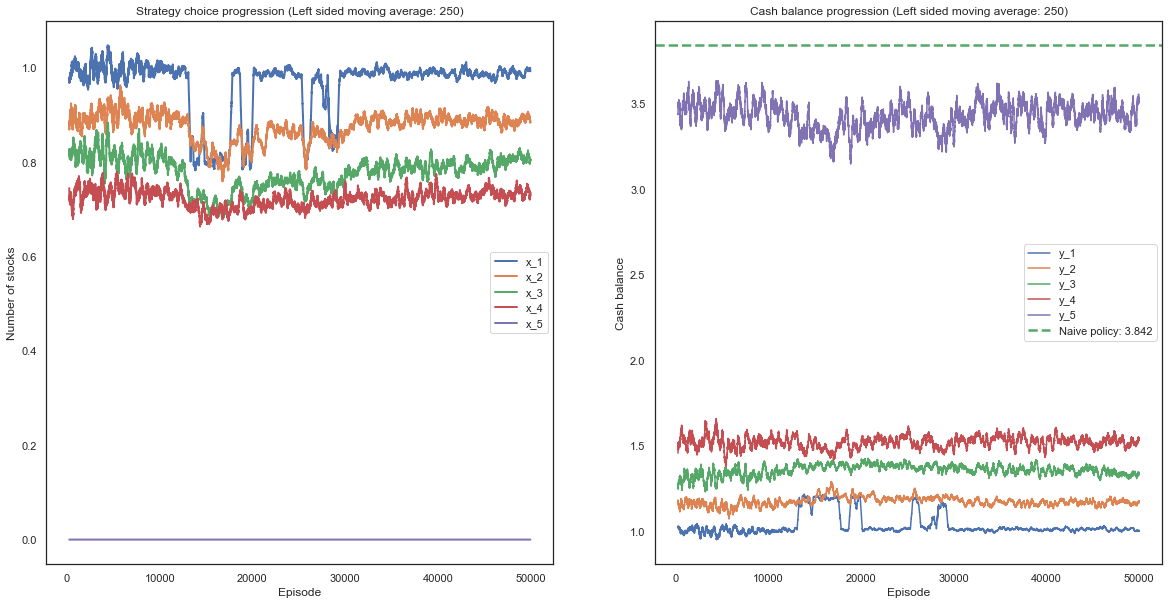

In [36]:
fig, ax =plt.subplots(1,2)




df_series_y_rolling = df_series_y.rolling(window=ROLLING_WINDOW).mean()
for index in range(0,5):
    sns.lineplot(x=range(df_series_y.shape[0]), y=col_names[index], data=df_series_y_rolling, label=f"x_{index+1}", ax=ax[0], linewidth=2)

for index in range(5,10):
    sns.lineplot(x=range(df_series_y.shape[0]), y=col_names[index], data=df_series_y_rolling, label=f"y_{index+1-5}", ax=ax[1])
    
ax[1].axhline(3.842, ls='--', label="Naive policy: {}".format(3.842, 2), c="g", linewidth=2.5)

ax[0].set(title="Strategy choice progression (Left sided moving average: 250)", xlabel="Episode", ylabel="Number of stocks")
ax[1].set(title="Cash balance progression (Left sided moving average: 250)", xlabel="Episode", ylabel="Cash balance")

ax[1].legend()
plt.show()
# plt.savefig(r"C:\Users\lukas\OneDrive\Universität\Mathematik\Bachelorarbeit\Latex\BA_main\figures\test_res\multi_p_1.png", bbox_inches = 'tight', pad_inches = 0)

### Average values

In [26]:
print(df_series_y[20000:].mean())

selection 0, period 1    0.976887
selection 0, period 2    0.877339
selection 0, period 3    0.779590
selection 0, period 4    0.724150
selection 0, period 5    0.000000
selection 1, period 1    1.023047
selection 1, period 2    1.177743
selection 1, period 3    1.364773
selection 1, period 4    1.526978
selection 1, period 5    3.436488
dtype: float64


In [27]:
print(df_series_y[20000:].std())

selection 0, period 1    0.112856
selection 0, period 2    0.143846
selection 0, period 3    0.154416
selection 0, period 4    0.170114
selection 0, period 5    0.000000
selection 1, period 1    0.112851
selection 1, period 2    0.199637
selection 1, period 3    0.283624
selection 1, period 4    0.393740
selection 1, period 5    0.868832
dtype: float64


In [28]:
def phi(x, alpha=0.01):
    return (np.exp(alpha*x)-1)/alpha

expv_y_5 = 1 - phi(-1)*1*(1.3**4)
print(expv_y_5)

3.8418669829000978


In [21]:
np.abs(phi(-1))*1.317

1.3104368952345602

In [33]:
liq_cost_naive =  (1.3**4)*(-phi(-1) - 1)
liq_cost_naive

-0.014233017099902951

In [29]:
LOG_NUM = 50000
PATH_TO_DF_PERIOD = r"C:\Users\lukas\OneDrive\Universität\Mathematik\Bachelorarbeit\log_dir\log_{}\SIMULATION_SUMMARY\simulation_summary_log_{}.pkl".format(LOG_NUM, LOG_NUM)
df_simulation = pd.read_pickle(PATH_TO_DF_PERIOD)

In [30]:
df_simulation.head()

,agent_choice_of_x1,agent_final_cash_balance,cumulative_liquidity_costs,episode,greedy,initial_state,optimal_choice_of_x1,optimal_final_cash_balance
0,1.319875,3.061214,-0.018622,0,1,"[[1.0], [1.0], [1.0], [0.0]]",NaN,NaN
1,1.548227,2.152658,-0.017667,1,1,"[[1.0], [1.0], [1.0], [0.0]]",NaN,NaN
2,0.570763,3.069546,-0.013631,2,1,"[[1.0], [1.0], [1.0], [0.0]]",NaN,NaN
3,1.150452,3.611340,-0.019793,3,1,"[[1.0], [1.0], [1.0], [0.0]]",NaN,NaN
4,0.280134,2.225481,-0.008117,4,1,"[[1.0], [1.0], [1.0], [0.0]]",NaN,NaN


In [31]:
X = "episode"
Y_1 = "cumulative_liquidity_costs"
Y_1_MA = "cumulative_liquidity_costs_ma"
Y_2_MA = "agent_final_cash_balance"

MA = 250

X_data = df_simulation[X]
Y_1_data = df_simulation[Y_1]
Y_1_MA_data = df_simulation[Y_1].rolling(window=MA).mean()
Y_2_MA_data = df_simulation[Y_2_MA].rolling(window=MA).std()

df_plot_1 = pd.DataFrame(
{
    X: X_data,
    Y_1: Y_1_data,
    Y_1_MA: Y_1_MA_data,
    Y_2_MA: Y_2_MA_data,
})

df_plot_1.head()

,episode,cumulative_liquidity_costs,cumulative_liquidity_costs_ma,agent_final_cash_balance
0,0,-0.018622,NaN,NaN
1,1,-0.017667,NaN,NaN
2,2,-0.013631,NaN,NaN
3,3,-0.019793,NaN,NaN
4,4,-0.008117,NaN,NaN


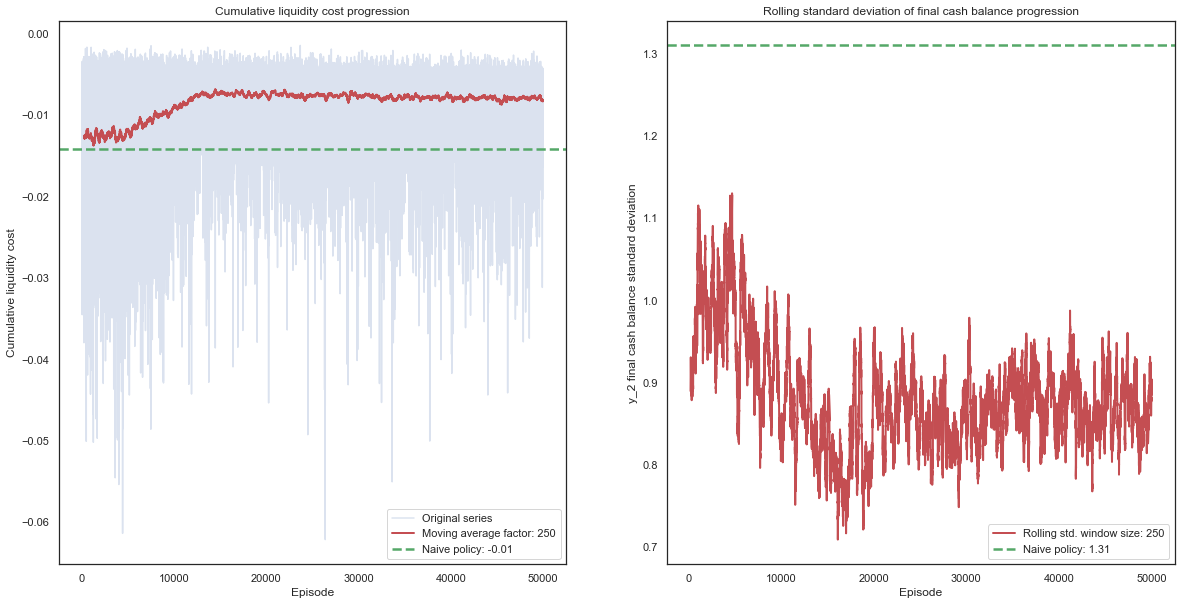

In [35]:
fig, ax = plt.subplots(1,2)
opacity = 0.2

sns.lineplot(x="episode", y=Y_1, data=df_plot_1, label="Original series", ax=ax[0], alpha=opacity, color="b")
sns.lineplot(x="episode", y=Y_1_MA, data=df_plot_1, label=f"Moving average factor: {MA}", ax=ax[0], color="r", linewidth=2)

sns.lineplot(x="episode", y=Y_2_MA, data=df_plot_1, label=f"Rolling std. window size: {MA}", ax=ax[1], color="r", linewidth=2)

ax[0].set(title="Cumulative liquidity cost progression", xlabel="Episode", ylabel="Cumulative liquidity cost")
ax[1].set(title="Rolling standard deviation of final cash balance progression", xlabel="Episode", ylabel="y_2 final cash balance standard deviation")

ax[0].axhline(liq_cost_naive, ls='--', label="Naive policy: {}".format(round(liq_cost_naive, 2)), c="g", linewidth=2.5)
ax[1].axhline(1.310, ls='--', label="Naive policy: {}".format(round(1.310, 2)), c="g", linewidth=2.5)

ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")

# plt.savefig(fname=r"C:\Users\lukas\OneDrive\Universität\Mathematik\Bachelorarbeit\Latex\BA_main\figures\test_res\multi_p_2_2.png",
#             bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [37]:
df_simulation.cumulative_liquidity_costs[20000:].mean()

-0.007815318784369326